In [1]:
import numpy as np
from matplotlib import pyplot as plt
import PIL
import io
import time
from tensorflow.keras.preprocessing.image import  img_to_array, load_img

In [2]:
img_label_csv_file_path = "drawing_box_img_label.csv"
outputs_img_folder = "img_with_bbox/"

confidence_threshold = 0.68
image_size = [500,500]
class_names=["hdooroper","cardooroper", "guideshoes", "fan", "limit_sw"]

In [45]:
res = np.array([[1.0, 0.9993491768836975, 0.4752233725350195, 0.2169765151421894, 0.6807484112615756, 0.47496530902579814], [1.0, 0.3011155426502228, 0.5336315902439015, 0.13059057213195704, 0.7500170980724437, 0.37156285880676365], [1.0, 0.16071394085884094, 0.5629240435449985, 0.06838618364558384, 0.78821702634407, 0.27465929708256553], [1.0, 0.14866553246974945, 0.44503097986511697, 0.17719678284643103, 0.6156417705278213, 0.38592473687675466], [1.0, 0.14055204391479492, 0.589103429650484, 0.20390124097266393, 0.8804404330382585, 0.3745907552982706], [1.0, 0.11883080005645752, 0.46276261799389673, 0.08467485150380934, 0.6852531576866453, 0.32044496622995533], [1.0, 0.08515801280736923, 0.5032029547643431, 0.23583558298718865, 0.7819561782268261, 0.39379337803175574], [1.0, 0.08315447717905045, 0.43258140151849506, 0.28984712562018966, 0.6714451527453252, 0.5763153010765381], [1.0, 0.06913978606462479, 0.5906099651087553, 0.12117385382716823, 0.8512529890309541, 0.32688588480884867], [1.0, 0.052511245012283325, 0.43110314487373114, 0.26903015321010054, 0.6049359356071266, 0.47649154447807723], [1.0, 0.04347795993089676, 0.24707453697504073, 0.2206640092604487, 0.5593878449805694, 0.4835888242588985], [1.0, 0.03666207566857338, 0.6973319887290499, 0.1325342840173558, 0.9012463156733366, 0.41298609568624867], [1.0, 0.034729957580566406, 0.45716571708010945, 0.4010206484458069, 0.6811327276678155, 0.6507252145150088], [1.0, 0.023250587284564972, 0.5253861211607043, 0.2852820352502714, 0.7256934066942151, 0.5455644060186495], [1.0, 0.02280777134001255, 0.21387395075296692, 0.2929944253711152, 0.4944641219197736, 0.5915935960701975], [1.0, 0.02192363701760769, 0.4004760729718903, 0.45596370897836763, 0.6255267317842742, 0.6929766434615129], [2.0, 0.020930984988808632, 0.5636198491940795, 0.08815176891108811, 0.7928632456466594, 0.7816824769730437], [1.0, 0.018494395539164543, 0.3813373522292799, 0.3588883583418983, 0.5936955142486864, 0.6036760451920373], [1.0, 0.01576963998377323, 0.28623174981779387, 0.40318590254607156, 0.4656209459984827, 0.7112406024215328], [1.0, 0.01417034212499857, 0.34355798960224226, 0.022682492407555904, 0.5403265240020725, 0.19624604569426374], [1.0, 0.013269190676510334, 0.22594587598568872, 0.11984727704685283, 0.5224063110935616, 0.3802119266976437], [1.0, 0.012852592393755913, 0.48804846061996643, 0.31693672705855697, 0.6442294226401486, 0.4063829317429742], [3.0, 0.01261468417942524, 0.37206576960420146, 0.19932502443100653, 0.7201828787409484, 0.4764586067855767], [1.0, 0.011871494352817535, 0.62823513140906, 0.04288339597771253, 0.8792275589443337, 0.24543664377143298], [1.0, 0.011473143473267555, 0.33326267588221836, 0.5048184089937319, 0.550200233816268, 0.7409463959655654]])

In [46]:
res[:,1]

array([0.99934918, 0.30111554, 0.16071394, 0.14866553, 0.14055204,
       0.1188308 , 0.08515801, 0.08315448, 0.06913979, 0.05251125,
       0.04347796, 0.03666208, 0.03472996, 0.02325059, 0.02280777,
       0.02192364, 0.02093098, 0.0184944 , 0.01576964, 0.01417034,
       0.01326919, 0.01285259, 0.01261468, 0.01187149, 0.01147314])

In [30]:
n_classes = len(class_names)

In [33]:
def _visualize_image(image, label, path_id):
        # Post-Processing in python

        fig = plt.figure(figsize=(4,4), dpi = 100)
        ax = fig.add_subplot(111)
        ax.imshow(image/255.)



        if len(label) > 0:

            r_label = label[:, 0]
            r_conf = label[:, 1]

            r_xmin = label[:, 2]
            r_ymin = label[:, 3]
            r_xmax = label[:, 4]
            r_ymax = label[:, 5]

            top_mask = r_conf > confidence_threshold
            top_label = r_label[top_mask]
            top_conf = r_conf[top_mask]
            top_xmin = r_xmin[top_mask]
            top_ymin = r_ymin[top_mask]
            top_xmax = r_xmax[top_mask]
            top_ymax = r_ymax[top_mask]


            current_axis = plt.gca()
            colors = plt.cm.hsv(np.linspace(0, 1, n_classes)).tolist()

            for i in range(top_conf.shape[0]):
                xmin = int(round(top_xmin[i] * image.shape[1]))
                ymin = int(round(top_ymin[i] * image.shape[0]))
                xmax = int(round(top_xmax[i] * image.shape[1]))
                ymax = int(round(top_ymax[i] * image.shape[0]))
                score = top_conf[i]
                label_id = int(top_label[i])
                label_name = class_names[label_id - 1]
                display_txt = '{:0.2f},{}'.format(score, label_name)
                coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
                color = colors[label_id-1]
                current_axis.add_patch(plt.Rectangle(*coords, fill = False, edgecolor=color, linewidth=2))
                current_axis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})

        fig.canvas.draw()

        buf = io.BytesIO()
        data = fig.savefig(buf, format='png')
        buf.seek(0)

        img = PIL.Image.open(buf)
        img.save(outputs_img_folder + "video_test_{:04d}.png".format(path_id))
        return np.array(img.getdata()).reshape(img.size[0], img.size[1], -1)


In [35]:
img_path = '20200429_092916_010.jpg'

In [40]:
image = img_to_array(load_img(img_path, grayscale=False, target_size=image_size)).astype('float32')

In [41]:
path_id = 2916

In [ ]:
images[i], labels[i], path_id = path_id

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

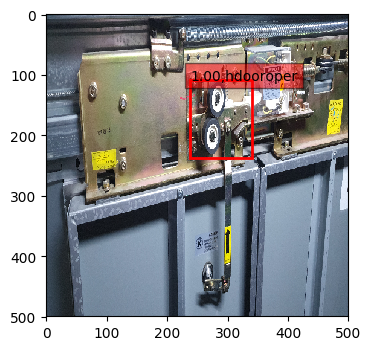

In [47]:
_visualize_image(image, res, path_id)

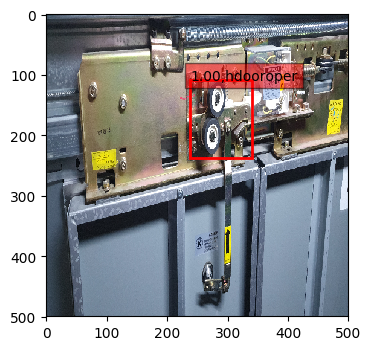

In [18]:
if __name__ == "__main__":

    csv_lines = []

    with open(img_label_csv_file_path, 'r') as rf:
        csv_lines = rf.readlines()[1:]

    res_id = 0

    label_lines = []

    for c_line in csv_lines:

        img_path, label_string = c_line.strip().split('.jpg,')
        img_path += ".jpg"
        img_array = img_to_array(load_img(img_path, grayscale=False, target_size=image_size)).astype('float32')


        labels = eval(label_string[1:-1])
        bboxs = []

        for lab in labels:

            if lab[1]>confidence_threshold:
                bboxs.append(lab)


        visualize_images_with_bbox1(images = np.array([img_array]), labels = np.array([bboxs]), class_names = class_names, path_start_id = res_id)

        res_id += 1

In [25]:
np.array([bboxs])[:,0]

array([[1.        , 0.99934918, 0.47522337, 0.21697652, 0.68074841,
        0.47496531]])

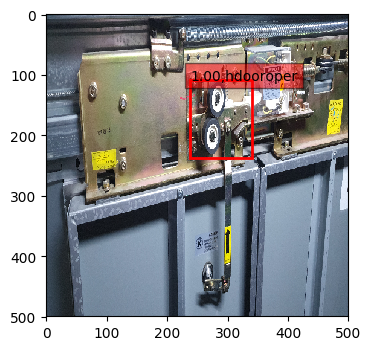

In [6]:
visualize_images_with_bbox1(images = np.array([img_array]), labels = np.array([bboxs]), class_names = class_names, path_start_id = res_id)
